In [ ]:
!pip install autoviml
!pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 1.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of imbalanced-ensemble to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.6/134.6 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 746.5/746.5 kB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/

In [ ]:
# Comprehensive Time Series Analysis of Air Passenger Traffic Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
# Download and load the dataset
from sklearn.datasets import fetch_openml

# Load Air Passengers dataset
def load_airpassengers():
    df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv')
    df['Month'] = pd.to_datetime(df['Month'])
    return df

In [ ]:
# Load and preview the dataset
data = load_airpassengers()
data = data.rename(columns={'Month': 'Date', 'Passengers': 'Traffic'})
data.set_index('Date', inplace=True)

In [ ]:
# Display basic information about the dataset
print("Dataset Info:")
print(data.info())
print("\nFirst few rows:")
print(data.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Traffic  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB
None

First few rows:
            Traffic
Date               
1949-01-01      112
1949-02-01      118
1949-03-01      132
1949-04-01      129
1949-05-01      121


In [ ]:
# Basic statistical analysis
print("\nBasic Statistics:")
print(data.describe())


Basic Statistics:
          Traffic
count  144.000000
mean   280.298611
std    119.966317
min    104.000000
25%    180.000000
50%    265.500000
75%    360.500000
max    622.000000


In [ ]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Traffic    0
dtype: int64


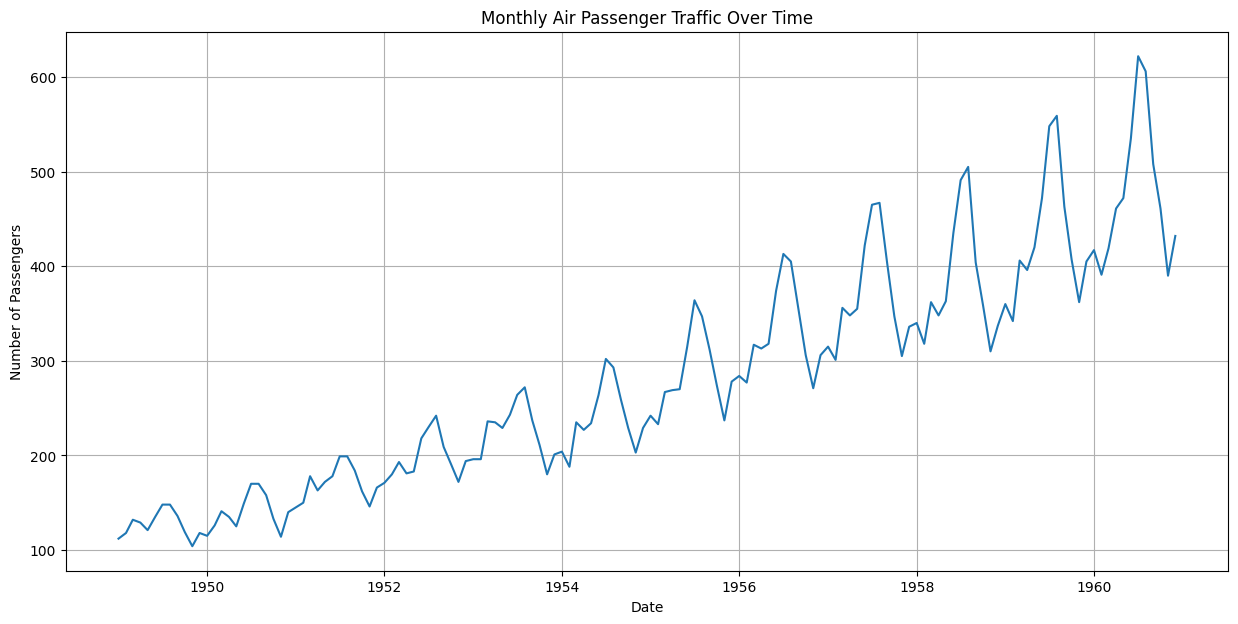

In [ ]:
# Time series visualization
plt.figure(figsize=(15, 7))
plt.plot(data.index, data['Traffic'])
plt.title('Monthly Air Passenger Traffic Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()

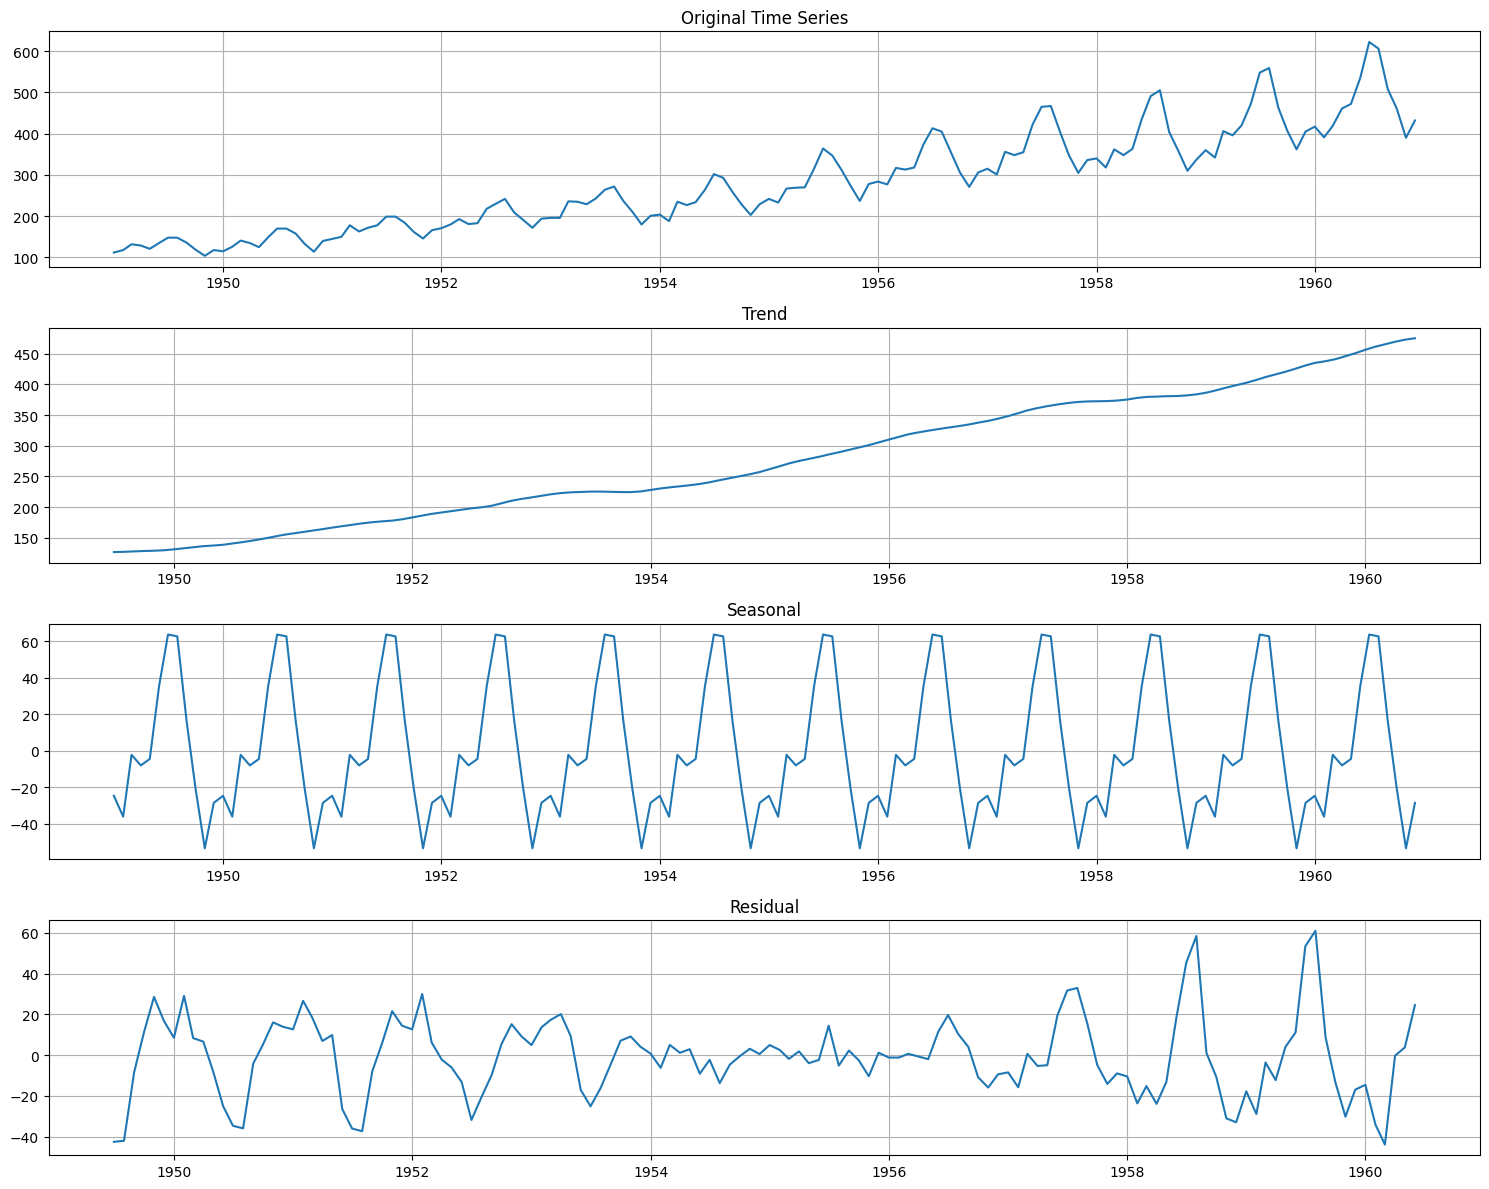

In [ ]:
# Decompose time series
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data['Traffic'], period=12)

plt.figure(figsize=(15, 12))

plt.subplot(411)
plt.plot(data.index, data['Traffic'])
plt.title('Original Time Series')
plt.grid(True)

plt.subplot(412)
plt.plot(data.index, decomposition.trend)
plt.title('Trend')
plt.grid(True)

plt.subplot(413)
plt.plot(data.index, decomposition.seasonal)
plt.title('Seasonal')
plt.grid(True)

plt.subplot(414)
plt.plot(data.index, decomposition.resid)
plt.title('Residual')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Add features for analysis
data['Year'] = data.index.year
data['Month_Num'] = data.index.month
data['Quarter'] = data.index.quarter

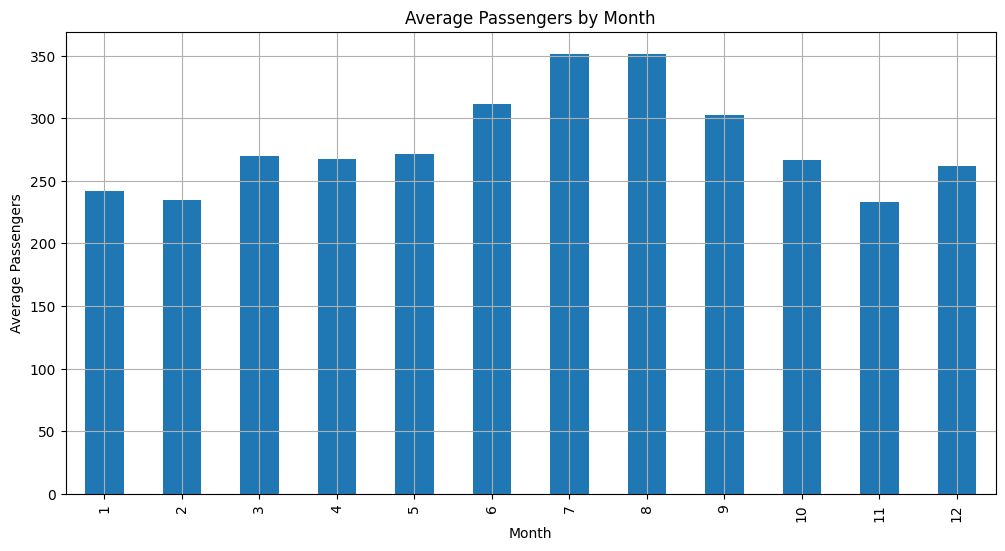

In [ ]:
# Monthly average passengers
monthly_avg = data.groupby('Month_Num')['Traffic'].mean()

plt.figure(figsize=(12, 6))
monthly_avg.plot(kind='bar')
plt.title('Average Passengers by Month')
plt.xlabel('Month')
plt.ylabel('Average Passengers')
plt.grid(True)
plt.show()

In [ ]:
# Anomaly Detection using Z-score method
def detect_anomalies(data, column, threshold=3):
    mean = data[column].mean()
    std = data[column].std()
    z_scores = (data[column] - mean) / std
    return abs(z_scores) > threshold

In [ ]:
# Detect anomalies
data['is_anomaly'] = detect_anomalies(data, 'Traffic')

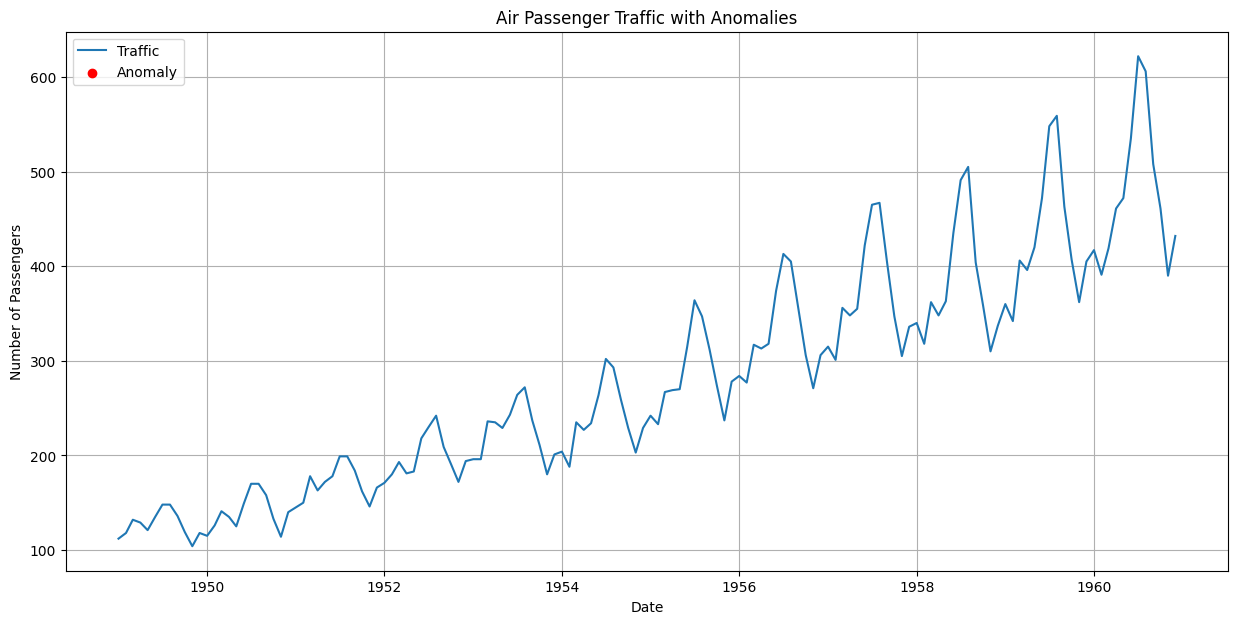

In [ ]:
# Plot with anomalies highlighted
plt.figure(figsize=(15, 7))
plt.plot(data.index, data['Traffic'], label='Traffic')
plt.scatter(data[data['is_anomaly']].index,
           data[data['is_anomaly']]['Traffic'],
           color='red',
           label='Anomaly')
plt.title('Air Passenger Traffic with Anomalies')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Clustering Analysis
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
# Prepare data for clustering
cluster_features = pd.DataFrame({
    'Traffic': data['Traffic'],
    'Month_Num': data['Month_Num'],
    'Year': data['Year']
})


In [ ]:
# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cluster_features)

In [ ]:
# Apply KMeans clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Add cluster labels to the data
data['Cluster'] = cluster_labels

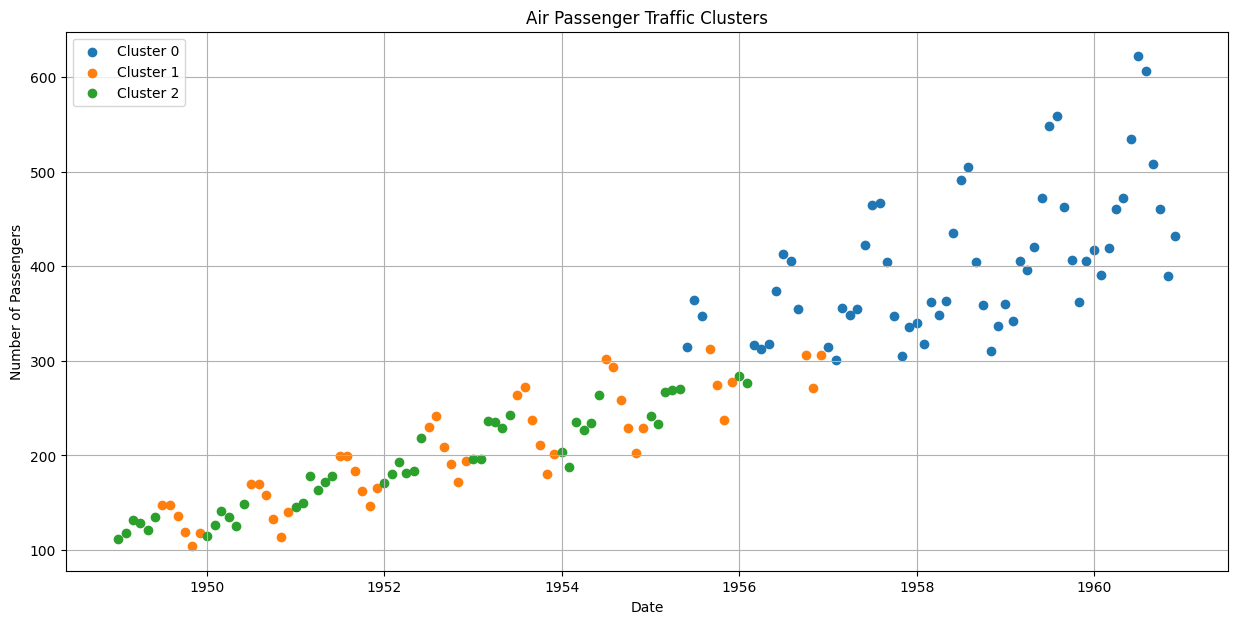

In [ ]:
# Visualize clusters
plt.figure(figsize=(15, 7))
for i in range(n_clusters):
    cluster_data = data[data['Cluster'] == i]
    plt.scatter(cluster_data.index, cluster_data['Traffic'],
               label=f'Cluster {i}')
plt.title('Air Passenger Traffic Clusters')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Feature Engineering for ML
data['Lag1'] = data['Traffic'].shift(1)
data['Lag12'] = data['Traffic'].shift(12)  # Previous year
data['Rolling_Mean'] = data['Traffic'].rolling(window=12).mean()
data['Rolling_Std'] = data['Traffic'].rolling(window=12).std()

In [ ]:
# Drop rows with NaN values after feature engineering
data_cleaned = data.dropna()